# header

In [108]:
import os

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [212]:
def fit_ols(df, dep):
    df = sm.add_constant(df)
    cols = list(df.columns)
    cols.remove(dep)
    return sm.OLS(df[dep], df[cols]).fit(), df

def check_cor(df, r):
    return (df.corr()["SalePrice"][1:-1]
              .apply(lambda x: (x if abs(x) >= r else pd.NA))
              .dropna())

In [193]:
# Import csv and check header
h = pd.read_csv(os.path.join("..", "data", "train.csv"))
pd.set_option('display.max_rows', h.shape[0]+1)
h.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [110]:
h.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [194]:
h.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [195]:
# First get rid of columns that have a lot of missing data
h = h.dropna(axis=1, thresh=250)
# Then remove all rows that have missing data
h.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [196]:
h.shape

(1460, 78)

In [198]:
# Average sale price
print(h["SalePrice"].mean())
h.groupby("YrSold")["SalePrice"].mean()

180921.19589041095


YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64

In [200]:
# Check correlation for all numerical columns
num_corr = check_cor(h, 0.6)
num_corr

OverallQual    0.790982
TotalBsmtSF    0.613581
1stFlrSF       0.605852
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: object

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Fri, 11 Sep 2020   Prob (F-statistic):          4.52e-223
Time:                        17:05:43   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

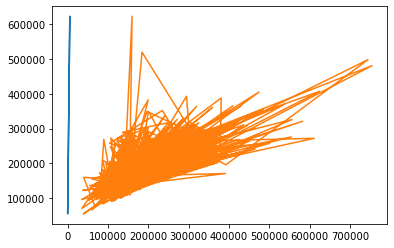

In [204]:
liv_area = h[["GrLivArea", "SalePrice"]]
liv_model = fit_ols(liv_area, "SalePrice")
plt.plot(liv_area, liv_model.predict(sm.add_constant(h["GrLivArea"])))
liv_model.summary()

In [205]:
# Focus on columns with square footage
# Replace GrLivArea by 2nd floor
nums_col = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea']
nums_df = h[nums_col + ["SalePrice"]]
fit_ols(nums_df, "SalePrice").summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     725.0
Date:                Fri, 11 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:06:21   Log-Likelihood:                -17744.
No. Observations:                1460   AIC:                         3.550e+04
Df Residuals:                    1455   BIC:                         3.552e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.276e+04   4229.525     -5.380      0.000   -3.11e+04   -1.45e+04
TotalBsmtSF    53.5713      4.870     10.999      0.000      44.018      63.125
1stFlrSF       63.7131      5.599     11.379      0.000      52.730      74.696
2ndFlrSF       72.0755      2.938     24.529      0.000      66.312      77.839
GarageArea    101.3675      6.838     14.824      0.000      87.954     114.781
==============================================================================
Omnibus:                      778.563   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73351.494
Skew:                          -1.557   Prob(JB):                         0.00
Kurtosis:                      37.584   Cond. No.                     6.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## General correlation check
There seem to be a strong correlation between the living area and the sale price.

## Neighborhood

Standard deviation: 79442

                mean     std          var
Neighborhood                             
NoRidge       335295  121412  14741033678
NridgHt       316270   96392   9291522722
StoneBr       310499  112969  12762147840
Timber        242247   64845   4204958524
Veenker       238772   72369   5237318181
Somerst       225379   56177   3155917785
ClearCr       212565   50231   2523207509
Crawfor       210624   68866   4742580425
CollgCr       197965   51403   2642336923
Blmngtn       194870   30393    923748382
Gilbert       192854   35986   1295048268
NWAmes        189050   37172   1381773798
SawyerW       186555   55651   3097144861
Mitchel       156270   36486   1331273828
NAmes         145847   33075   1093978476
NPkVill       142694    9377     87934027
SWISU         142591   32622   1064254757
Blueste       137500   19091    364500000
Sawyer        136793   22345    499304797
OldTown       128225   52650   2772083909
Edwards       128219   43208   1866984536
BrkSide

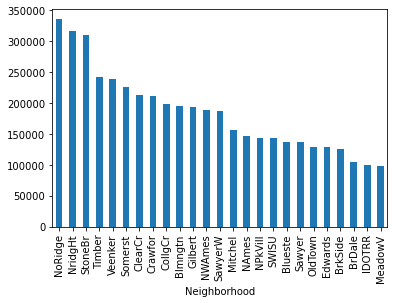

In [209]:
# I suspect the neighborhood is correlated
zone_price = (h.groupby("Neighborhood")["SalePrice"]
               .agg(["mean", "std", "var"])
               .sort_values(by="mean", ascending=False)
               .astype("int64"))

zone_price["mean"].plot(kind="bar")
v = (h[["Neighborhood", "SalePrice"]]
     .std()[0]
     .astype("int64"))

print(f"Standard deviation: {v}\n")
print(zone_price)

In [210]:
zone = h[["Neighborhood", "SalePrice"]]
zone = pd.get_dummies(zone, drop_first=True, prefix="n")

In [211]:
# Check regression for neighborhood
fit_ols(zone, "SalePrice").summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     71.78
Date:                Fri, 11 Sep 2020   Prob (F-statistic):          1.56e-225
Time:                        17:08:17   Log-Likelihood:                -17968.
No. Observations:                1460   AIC:                         3.599e+04
Df Residuals:                    1435   BIC:                         3.612e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.949e+05   1.31e+04     14.879      0.000    1.69e+05    2.21e+05
n_Blueste  -5.737e+04   4.04e+04     -1.421      0.155   -1.37e+05    2.18e+04
n_BrDale   -9.038e+04   1.88e+04     -4.805      0.000   -1.27e+05   -5.35e+04
n_BrkSide  -7.004e+04   1.49e+04     -4.703      0.000   -9.93e+04   -4.08e+04
n_ClearCr   1.769e+04   1.66e+04      1.066      0.287   -1.49e+04    5.03e+04
n_CollgCr   3094.8910   1.38e+04      0.224      0.823    -2.4e+04    3.02e+04
n_Crawfor   1.575e+04   1.51e+04      1.042      0.298   -1.39e+04    4.54e+04
n_Edwards  -6.665e+04   1.42e+04     -4.705      0.000   -9.44e+04   -3.89e+04
n_Gilbert  -2016.3760   1.44e+04     -0.140      0.889   -3.03e+04    2.63e+04
n_IDOTRR   -9.475e+04   1.58e+04     -5.988      0.000   -1.26e+05   -6.37e+04
n_MeadowV  -9.629e+04   1.85e+04     -5.199      0.000   -1.33e+05      -6e+04
n_Mitchel   -3.86e+04   1.52e+04     -2.540      0.011   -6.84e+04   -8784.735
n_NAmes    -4.902e+04   1.36e+04     -3.609      0.000   -7.57e+04   -2.24e+04
n_NPkVill  -5.218e+04   2.23e+04     -2.344      0.019   -9.58e+04   -8510.657
n_NWAmes   -5820.8139   1.45e+04     -0.400      0.689   -3.43e+04    2.27e+04
n_NoRidge   1.404e+05   1.56e+04      9.015      0.000     1.1e+05    1.71e+05
n_NridgHt   1.214e+05   1.45e+04      8.390      0.000     9.3e+04     1.5e+05
n_OldTown  -6.665e+04    1.4e+04     -4.744      0.000   -9.42e+04   -3.91e+04
n_SWISU    -5.228e+04    1.7e+04     -3.080      0.002   -8.56e+04    -1.9e+04
n_Sawyer   -5.808e+04   1.45e+04     -3.999      0.000   -8.66e+04   -2.96e+04
n_SawyerW  -8315.0857   1.49e+04     -0.559      0.576   -3.75e+04    2.08e+04
n_Somerst   3.051e+04   1.43e+04      2.129      0.033    2393.494    5.86e+04
n_StoneBr   1.156e+05    1.7e+04      6.812      0.000    8.23e+04    1.49e+05
n_Timber    4.738e+04   1.58e+04      3.007      0.003    1.65e+04    7.83e+04
n_Veenker    4.39e+04   2.09e+04      2.101      0.036    2913.679    8.49e+04
==============================================================================
Omnibus:                      618.883   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5526.438
Skew:                           1.737   Prob(JB):                         0.00
Kurtosis:                      11.875   Cond. No.                         48.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""